# Data Bootcamp Final Project
Rachel Lin\
Yuhang Fan\
bosen li\
Miranda Ren



In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('marketing_campaign.csv',sep='\t')

#Content 

URL:https://www.kaggle.com/imakash3011/customer-personality-analysis

People

ID: Customer's unique identifier\
Year_Birth: Customer's birth year\
Education: Customer's education level\
Marital_Status: Customer's marital status\
Income: Customer's yearly household income\
Kidhome: Number of children in customer's household\
Teenhome: Number of teenagers in customer's household\
Dt_Customer: Date of customer's enrollment with the company\
Recency: Number of days since customer's last purchase\
Complain: 1 if customer complained in the last 2 years, 0 otherwise\
Products

MntWines: Amount spent on wine in last 2 years\
MntFruits: Amount spent on fruits in last 2 years\
MntMeatProducts: Amount spent on meat in last 2 years\
MntFishProducts: Amount spent on fish in last 2 years\
MntSweetProducts: Amount spent on sweets in last 2 years\
MntGoldProds: Amount spent on gold in last 2 years\
Promotion

NumDealsPurchases: Number of purchases made with a discount\
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise\
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise\
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise\
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise\
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise\
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise\
Place

NumWebPurchases: Number of purchases made through the company’s web site\
NumCatalogPurchases: Number of purchases made using a catalogue\
NumStorePurchases: Number of purchases made directly in stores\
NumWebVisitsMonth: Number of visits to company’s web site in the last month\

# Data cleaning

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


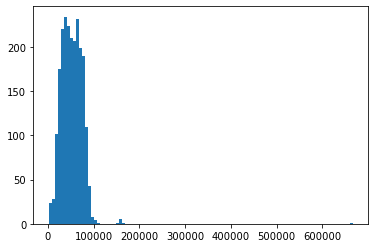

In [5]:
plt.hist(df.Income, bins=100);

In [6]:
df1 = df.loc[df.Income < 120000,:]

In [7]:
df1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [8]:
df.shape

(2240, 29)

In [9]:
df1.shape

(2208, 29)

In [10]:
df1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2208, dtype: bool

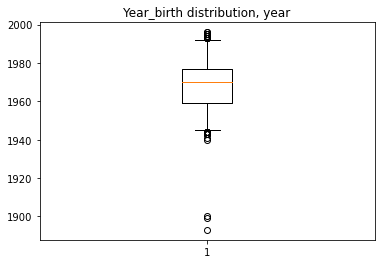

In [11]:
ax = plt.subplot(1, 1, 1)
ax.boxplot(df1.Year_Birth, whis=[1, 99])
ax.set_title('Year_birth distribution, year')
plt.show()

In [12]:
df2 = df1.loc[df1.Year_Birth > 1920,:]

In [13]:
df2.shape

(2205, 29)

In [14]:
df2.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [15]:
df2['Dt_Customer']

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2205, dtype: object

In [16]:
df2.Dt_Customer = pd.to_datetime(df2.Dt_Customer)
(df2['Dt_Customer'].min(), df2['Dt_Customer'].max())

/Users/leafan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


(Timestamp('2012-01-08 00:00:00'), Timestamp('2014-12-06 00:00:00'))

In [17]:
df2.Kidhome.max()

2

In [18]:
df2.Teenhome.max()

2

In [19]:
a = df2.iloc[:,9:15]

In [20]:
a.describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143
std,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000
50%,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000
75%,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000
max,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000


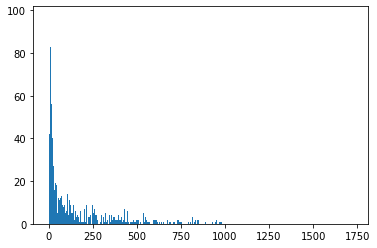

In [21]:
plt.hist(df2.MntMeatProducts, bins=1000);

In [22]:
df2.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.0,2205.0,2205.00000
mean,5585.439456,1968.904308,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,...,5.336961,0.073923,0.074376,0.073016,0.064399,0.013605,0.009070,3.0,11.0,0.15102
std,3247.546423,11.705801,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,...,2.413535,0.261705,0.262442,0.260222,0.245518,0.115872,0.094827,0.0,0.0,0.35815
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000
25%,2815.000000,1959.000000,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000
50%,5455.000000,1970.000000,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000
75%,8418.000000,1977.000000,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000
max,11191.000000,1996.000000,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.00000


# EDA part1

In [23]:
b = df2.iloc[:,15:]
b.describe()

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.0,2205.0,2205.00000
mean,2.318367,4.100680,2.645351,5.823583,5.336961,0.073923,0.074376,0.073016,0.064399,0.013605,0.009070,3.0,11.0,0.15102
std,1.886107,2.737424,2.798647,3.241796,2.413535,0.261705,0.262442,0.260222,0.245518,0.115872,0.094827,0.0,0.0,0.35815
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000
25%,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000
50%,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000
75%,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000
max,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.00000


In [24]:
df2 = df2.drop(columns=['Z_CostContact','Z_Revenue'])

In [25]:
df2.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,5585.439456,1968.904308,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,...,2.645351,5.823583,5.336961,0.073923,0.074376,0.073016,0.064399,0.013605,0.009070,0.15102
std,3247.546423,11.705801,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,...,2.798647,3.241796,2.413535,0.261705,0.262442,0.260222,0.245518,0.115872,0.094827,0.35815
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2815.000000,1959.000000,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5455.000000,1970.000000,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,8418.000000,1977.000000,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,11191.000000,1996.000000,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [26]:
import seaborn as sns

In [27]:
df2.info()
df2.size  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2205 non-null   int64         
 1   Year_Birth           2205 non-null   int64         
 2   Education            2205 non-null   object        
 3   Marital_Status       2205 non-null   object        
 4   Income               2205 non-null   float64       
 5   Kidhome              2205 non-null   int64         
 6   Teenhome             2205 non-null   int64         
 7   Dt_Customer          2205 non-null   datetime64[ns]
 8   Recency              2205 non-null   int64         
 9   MntWines             2205 non-null   int64         
 10  MntFruits            2205 non-null   int64         
 11  MntMeatProducts      2205 non-null   int64         
 12  MntFishProducts      2205 non-null   int64         
 13  MntSweetProducts     2205 non-nul

59535

Problem Statement - Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers. Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

In [28]:
# category spend most during these 2 years
# education vs spending category
# income and spend
# marital staus vs spending 
# income vs discount 
# with/without child vs spending
# eduation vs income
# education vs spending
df2.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0


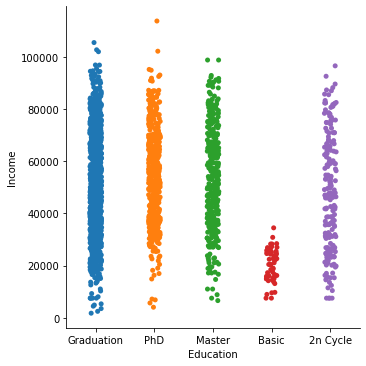

In [29]:
# education vs income
ax= sns.catplot(x='Education', y='Income',data = df2)

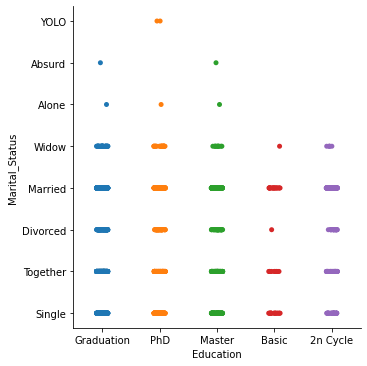

In [30]:
# eduction and marital_status
bx=sns.catplot(x='Education', y='Marital_Status',data = df2)

<AxesSubplot:xlabel='NumWebVisitsMonth', ylabel='count'>

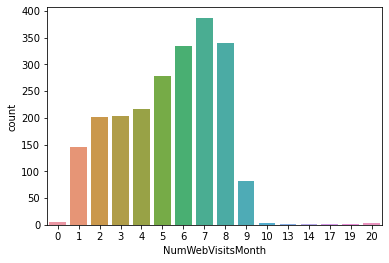

In [31]:
#number of visits per month
sns.countplot(x='NumWebVisitsMonth', data=df2)

In [32]:
df2["totalPurchases"] = df2["NumDealsPurchases"] + df2["NumWebPurchases"] + df2["NumCatalogPurchases"]
df2["totalPurchases"]

0       21
1        4
2       11
3        4
4       13
        ..
2235    14
2236    17
2237     6
2238    13
2239     7
Name: totalPurchases, Length: 2205, dtype: int64

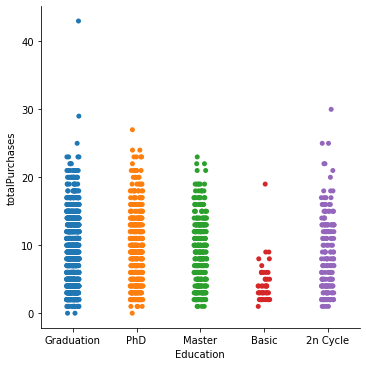

In [33]:
sns.catplot(x='Education', y='totalPurchases',data = df2)

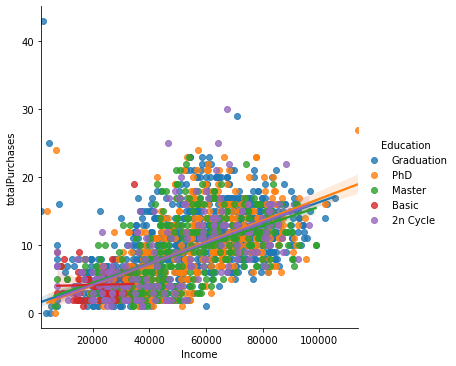

In [34]:
sns.lmplot(x="Income", y="totalPurchases",data=df2, hue="Education")

#EDA Part2


In [35]:
df3=df2

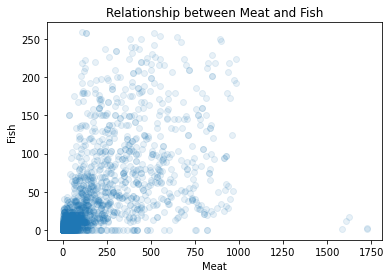

In [36]:
def scatter(df3, var1, var2, title, xlabel, ylabel, alpha=1):
    plt.scatter(df[var1], df[var2], alpha=alpha)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
    
scatter(df, 'MntMeatProducts', 'MntFishProducts', 'Relationship between Meat and Fish', 'Meat', 'Fish', alpha=0.1)

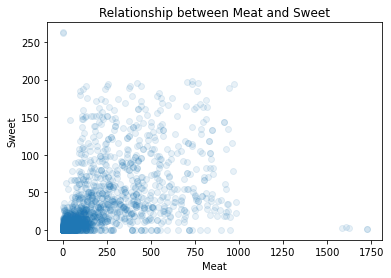

In [37]:
scatter(df3, 'MntMeatProducts', 'MntSweetProducts', 'Relationship between Meat and Sweet', 'Meat', 'Sweet', alpha=0.1)

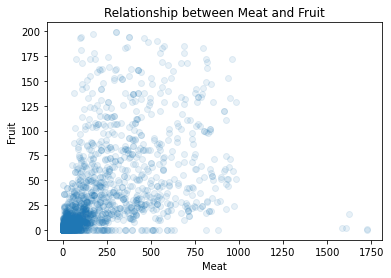

In [38]:
scatter(df3, 'MntMeatProducts', 'MntFruits', 'Relationship between Meat and Fruit', 'Meat', 'Fruit', alpha=0.1)

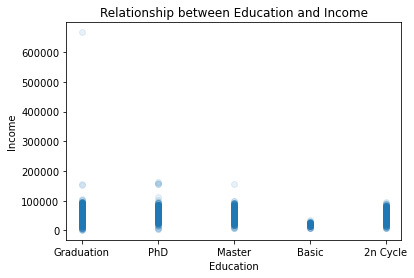

In [39]:
scatter(df3, 'Education', 'Income', 'Relationship between Education and Income', 'Education', 'Income', alpha=0.1)

Observation:
Meat has positive relationship with fish, sweet and fruit, therefore they are not substitution.
Income of Graduation, PhD and Master education levels are not have large differences. People in the basic education level have much lower income than the first three, where most people are in the income range within 40000.

In [40]:
test = df3.corr()

In [41]:
test[test>0.5]

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,totalPurchases
ID,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year_Birth,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,NaN,NaN,1.000000,NaN,NaN,NaN,0.730495,0.537920,0.702500,0.551758,...,0.687206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.595925
Kidhome,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Teenhome,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recency,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntWines,NaN,NaN,0.730495,NaN,NaN,NaN,1.000000,NaN,0.593119,NaN,...,0.639373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.654019
MntFruits,NaN,NaN,0.537920,NaN,NaN,NaN,NaN,1.000000,0.568100,0.592556,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntMeatProducts,NaN,NaN,0.702500,NaN,NaN,NaN,0.593119,0.568100,1.000000,0.595673,...,0.517245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntFishProducts,NaN,NaN,0.551758,NaN,NaN,NaN,NaN,0.592556,0.595673,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df3.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'totalPurchases'],
      dtype='object')

In [43]:
target_cols = [_ for _ in df3.columns if _ not in ["ID",'Z_CostContact', 'Z_Revenue']]

In [44]:
sns.set(rc={'figure.figsize':(15,11)})

<AxesSubplot:>

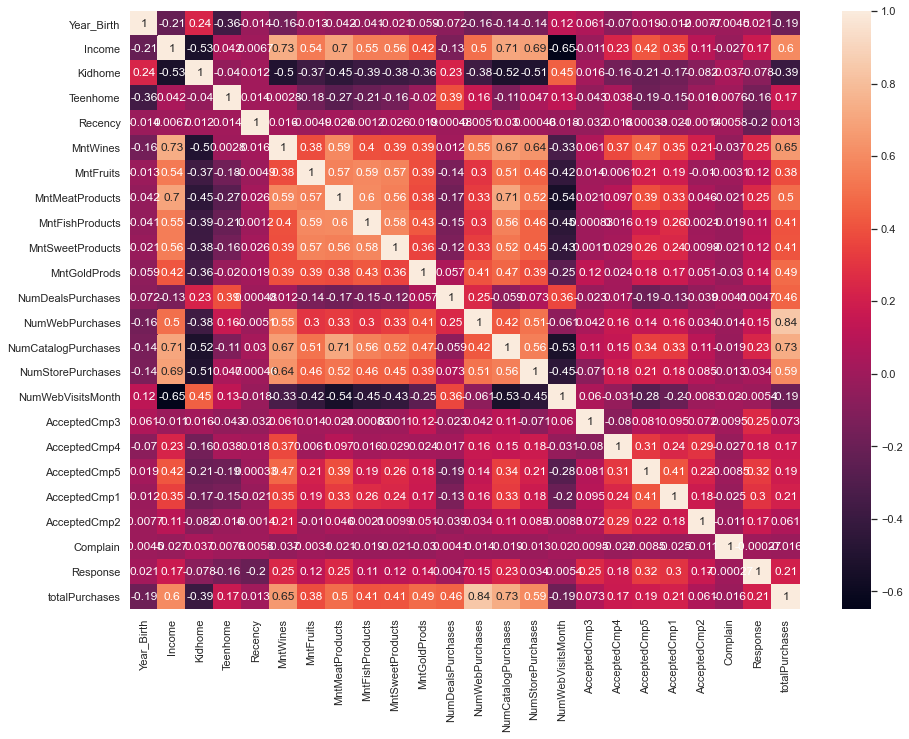

In [45]:
sns.heatmap(df3[target_cols].corr(),annot = True)

<AxesSubplot:>

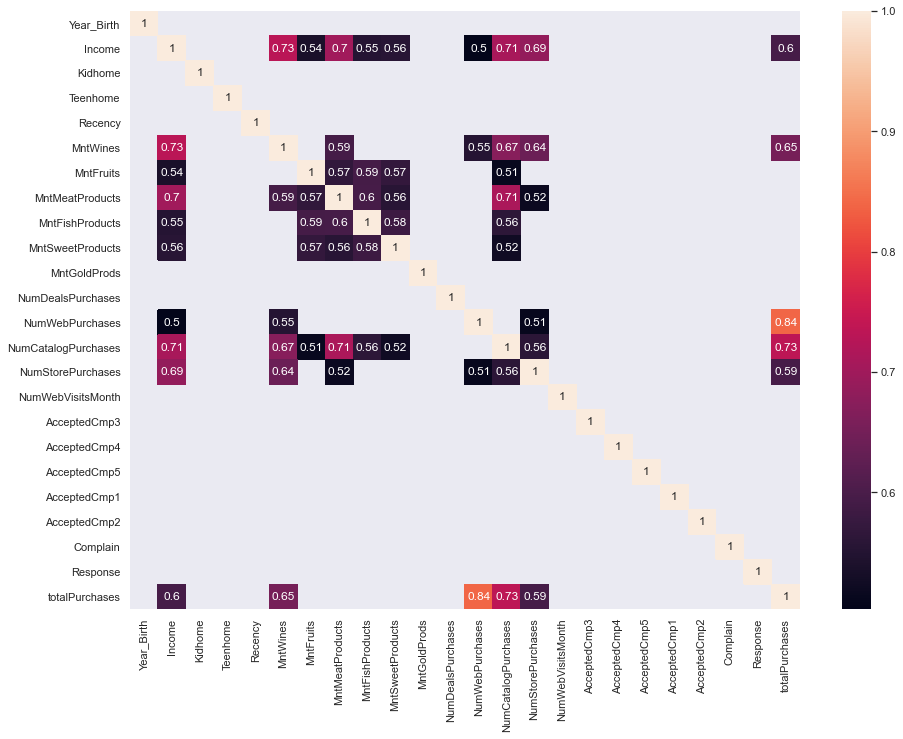

In [46]:
mask = df3[target_cols].corr() < 0.5
sns.heatmap(df3[target_cols].corr(),annot = True,mask = mask)

# clustering

In [47]:
#clustering 

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA


In [48]:
ds1 = df2.copy()
#Get list of categorical variables
categorical_var = (ds1.dtypes == 'object')
object_cols = list(categorical_var[categorical_var].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Marital_Status']


In [49]:
#Label Encoding the object dtypes.
Labele=LabelEncoder()
for i in object_cols:
    ds1[i]=ds1[[i]].apply(Labele.fit_transform)
    


In [50]:
ds1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,totalPurchases
0,5524,1957,2,4,58138.0,0,0,2012-04-09,58,635,...,4,7,0,0,0,0,0,0,1,21
1,2174,1954,2,4,46344.0,1,1,2014-08-03,38,11,...,2,5,0,0,0,0,0,0,0,4
2,4141,1965,2,5,71613.0,0,0,2013-08-21,26,426,...,10,4,0,0,0,0,0,0,0,11
3,6182,1984,2,5,26646.0,1,0,2014-10-02,26,11,...,4,6,0,0,0,0,0,0,0,4
4,5324,1981,4,3,58293.0,1,0,2014-01-19,94,173,...,6,5,0,0,0,0,0,0,0,13


In [51]:
#drop columns 
cols_del = ['Dt_Customer', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response','ID','Year_Birth']
ds = ds1.drop(cols_del, axis=1)

In [52]:
#Dimensionality reduction with PCA

#Scaling data for the dimensionality reduction
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = scaler.transform(ds)
scaled_ds = pd.DataFrame(scaled_ds,columns= ds.columns)
scaled_ds.head()

#pca
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pca.transform(scaled_ds)
PCA_ds2 = pd.DataFrame(PCA_ds)

PCA_ds2.head()

,0,1,2
0,4.317521,0.246230,2.013807
1,-2.581289,-0.412601,-0.285882
2,1.956214,-0.488821,0.032335
3,-2.696028,-0.933934,0.342800
4,0.098666,0.856996,-0.079790


In [53]:
# choose the number of clusters (k) quantitatively

#Elbow Method

def elbow(data,K):

    KM = [KMeans(n_clusters=k).fit(data) for k in K]  
    centroids = [k.cluster_centers_ for k in KM] 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]      
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]     
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
   


    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
   
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

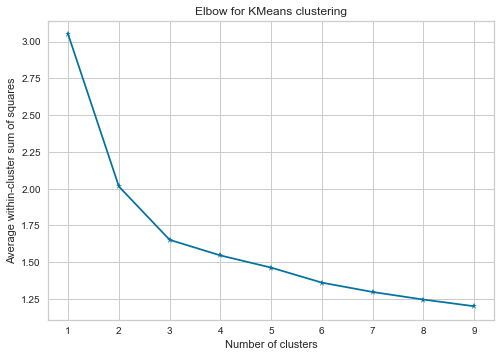

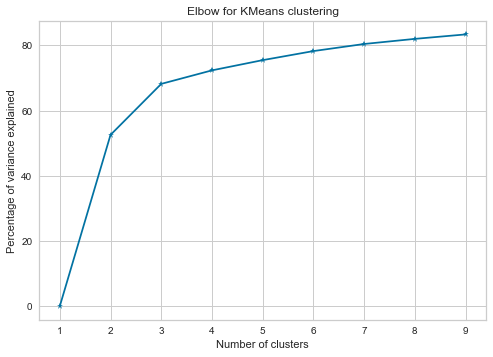

In [54]:
elbow(PCA_ds2, range(1,10))

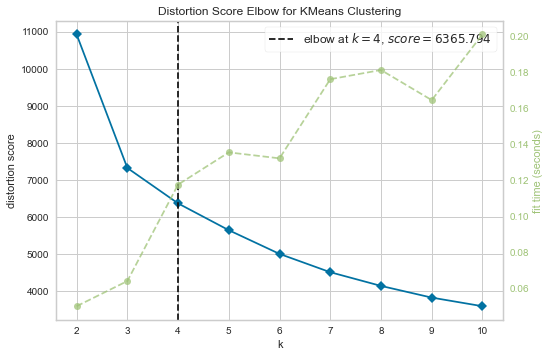

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [55]:
Elbow = KElbowVisualizer(KMeans(), k=10)
Elbow.fit(PCA_ds2)
Elbow.show()

In [56]:
# fit model and predict clusters
AC = KMeans(n_clusters=4)
clusterds = AC.fit_predict(PCA_ds2)
ds["label"] = clusterds
ds.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,totalPurchases,label
0,2,4,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,21,2
1,2,4,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,4,0
2,2,5,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,11,1
3,2,5,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,4,0
4,4,3,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,13,3


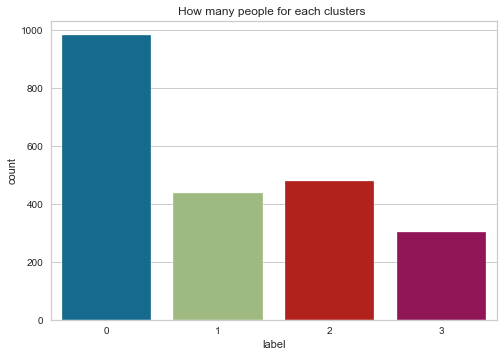

In [57]:
#How many people for each clusters 
plot = sns.countplot(x=ds["label"])
plot.set_title("How many people for each clusters ")
plt.show()

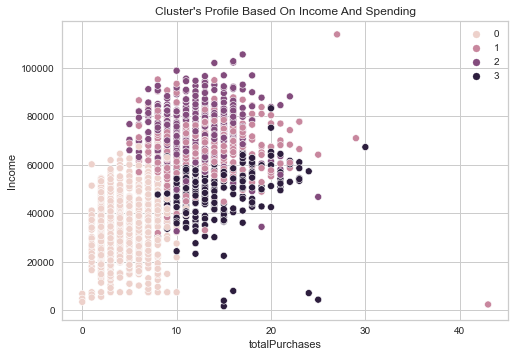

In [58]:
pl = sns.scatterplot(data = ds,x=ds["totalPurchases"], y=ds["Income"],hue=ds["label"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()



group 0: high total purchse & average income\
group 1: low total purchse & low to average income\
group 2: high total purchse & high income\
group 3: high total purchse & high income

# EDA part3

In [59]:
df = df2.copy()

In [60]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'totalPurchases'],
      dtype='object')

In [61]:
df[['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases']]

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,3,8,10,4
1,2,1,1,2
2,1,8,2,10
3,2,2,0,4
4,5,5,3,6
...,...,...,...,...
2235,2,9,3,4
2236,7,8,2,5
2237,1,2,3,13
2238,2,6,5,10


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Income', ylabel='NumStorePurchases'>

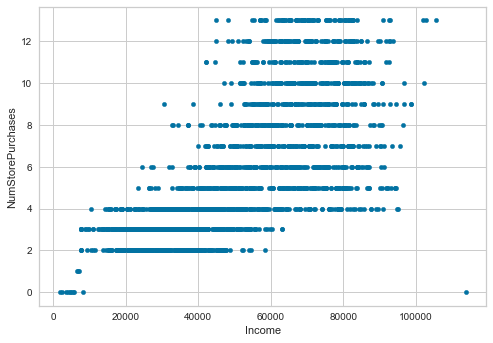

In [62]:
df.plot.scatter(x='Income',y='NumStorePurchases')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Year_Birth', ylabel='Income'>

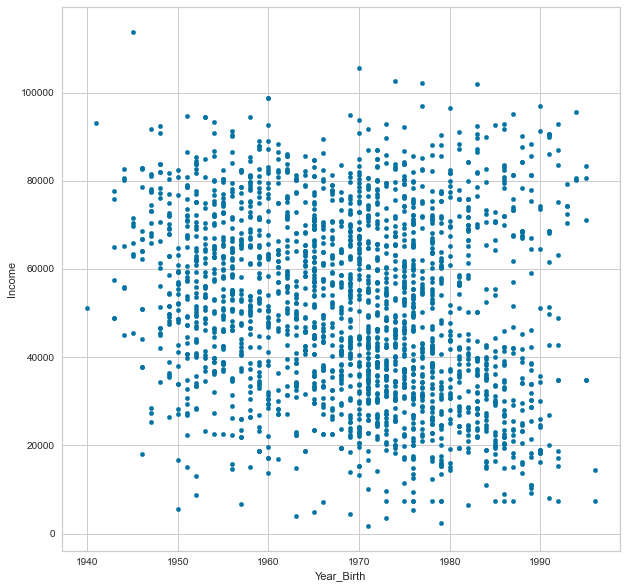

In [63]:
df.plot.scatter(x='Year_Birth',y='Income',figsize=(10,10))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Income', ylabel='MntGoldProds'>

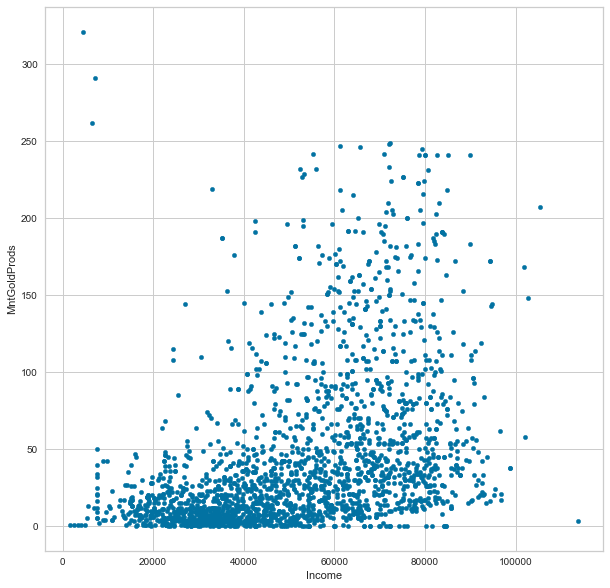

In [64]:
# 。。。。
df.plot.scatter(x='Income',y='MntGoldProds',figsize=(10,10))

<AxesSubplot:xlabel='Education', ylabel='Income'>

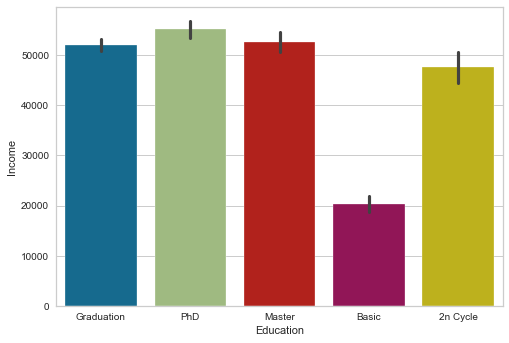

In [65]:
import seaborn as sns
sns.barplot(x = 'Education', y = 'Income', data=df)

<AxesSubplot:xlabel='Income', ylabel='MntWines'>

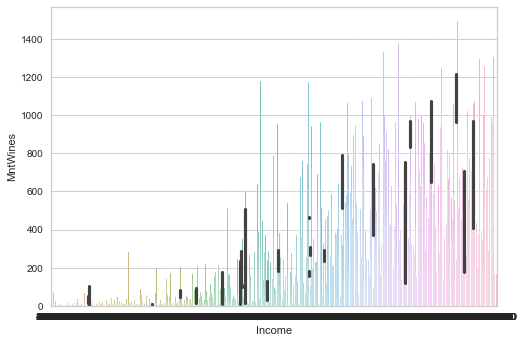

In [66]:
import seaborn as sns
sns.barplot(x = 'Income', y = 'MntWines', data=df)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Income', ylabel='MntWines'>

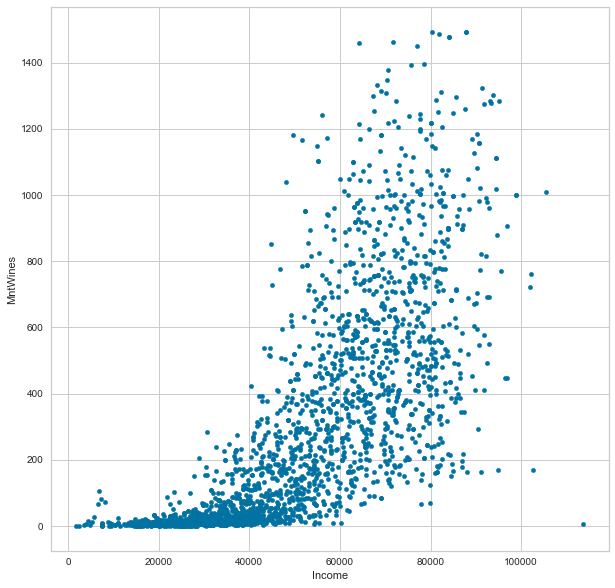

In [67]:
df.plot.scatter(x='Income',y='MntWines',figsize=(10,10))

## Observation
- People who have higher education level are more likely to have higher income
- People who have higher income tends to purchase larger amount of wine
- People who have higher income will do more store purchases
- There is no obvious relationship between the age and the amount of income

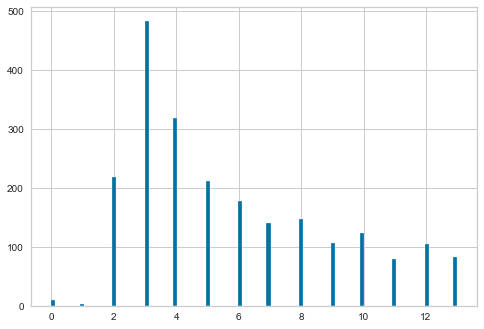

In [68]:
plt.hist(df.NumStorePurchases, bins=100);

# Prediction and Regression


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [70]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'totalPurchases'],
      dtype='object')

In [71]:
ml_df = df[['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome','NumStorePurchases']]

In [72]:
ml_df = pd.get_dummies(data=ml_df)

In [73]:
Y = ml_df.loc[:,'NumStorePurchases']
X = ml_df.drop(columns = 'NumStorePurchases')

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size = 0.3, random_state=7)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [75]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test, y_pred)

0.5006969841012663

In [76]:
regressor.score(X_test,y_test)

0.5006969841012663

In [77]:
regressor.score(X_train,y_train)

0.5022762659537072

In [78]:
from sklearn.linear_model import Ridge

# fit the ridge classifier and print training and test set score
ridge = Ridge().fit(X_train, y_train)
print('Training set score: {}'.format(ridge.score(X_train, y_train)))
print('Test set score: {}'.format(ridge.score(X_test, y_test)))

Training set score: 0.5022403144472465
Test set score: 0.5007810620403385


In [79]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.334
